# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
wine = pd.read_csv("wine_quality_white.tsv.gz",sep="\t").dropna(axis=1)
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
4433,6.9,0.56,0.26,10.9,0.060,55.0,193.0,0.99690,3.21,0.44,9.4,5
1331,6.8,0.15,0.32,8.8,0.058,24.0,110.0,0.99720,3.40,0.40,8.8,6
3153,5.8,0.29,0.33,3.7,0.029,30.0,88.0,0.98994,3.25,0.42,12.3,6
3557,8.1,0.20,0.28,0.9,0.023,49.0,87.0,0.99062,2.92,0.36,11.1,6
4584,5.9,0.34,0.25,2.0,0.042,12.0,110.0,0.99034,3.02,0.54,11.4,6
3057,7.2,0.27,0.37,5.4,0.026,27.0,114.0,0.99174,3.13,0.84,12.7,5
1562,7.1,0.34,0.49,1.5,0.027,26.0,126.0,0.99000,3.30,0.33,12.2,7
1815,6.8,0.30,0.35,2.8,0.038,10.0,164.0,0.99120,3.09,0.53,12.0,6
3788,6.6,0.27,0.52,8.1,0.044,53.0,202.0,0.99548,3.18,0.48,9.5,5
152,6.9,0.25,0.30,4.1,0.054,23.0,116.0,0.99400,2.99,0.38,9.4,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
# YOUR CODE HERE
wine.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'target']

The first 10 columns in the red subset of the Wine dataset are as follows: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, and sulphates. All of these variables are continuous and take on floating point values, meaning there are many possible values the variable could take on within the range between the minimum and maximum amounts of each column. According to the paper from Cortez et al., the fixed acidity column is measured in terms of g(tartaric acid)/dm^3 and may affect a wine's freshness and flavor. Volatile acidity, measured in g(acetic acid)/dm^3, could potentially affect the sweetness of a wine. The citric acid variable (g/dm^3) can be used to adjust the citrus flavor of a given wine. Residual sugar may determine a wine's sweetness and is measured in terms of g/dm^3. Further, chlorides (g(sodium chloride)/dm3) tend to affect the saltiness of wine. Free sulfur dioxide (in mg/dm^3) is used to prevent spoilage in wine. On the other hand, total sulfur dioxide (in mg/dm^3) can prevent oxidaton and maintain a wine's freshness. Density, which is measured in terms of g/cm^3, refers to a wine's properties that affect the flavor and grape quality. PH can affect a wine's flavor, color, and preservation through measuring the strength of acid. A lower pH is ideal in terms of stability and flavor. Finally, sulfates (in g(potassium sulphate)/dm^3) can be used to preserve wine as a preventative measure against spoilage. Overall, the features present in this data set are factors that are utilized to scientifically measure a white wine's comprehensive taste.

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

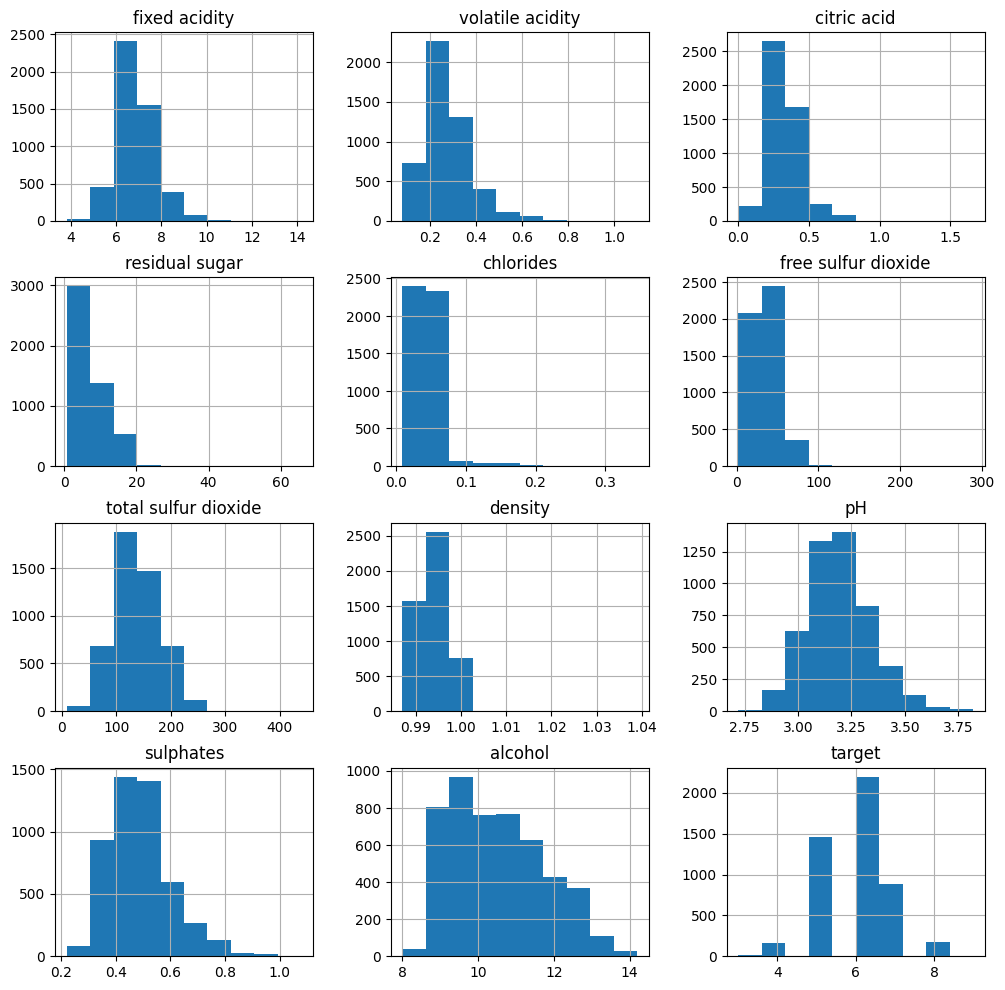

In [5]:
# YOUR CODE HERE
wine.hist(figsize=(12,12))

Fixed Acidity: Skewed right


Volatile Acidity: Skewed right


Citric Acid: Skewed right


Residual Sugar: Skewed right


Chlorides: Skewed right


Free Sulfur Dioxide: Skewed right


Total Sulfur Dioxide: Gaussian


Density: Gaussian


pH: Gaussian


Sulphates: Skewed right


### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

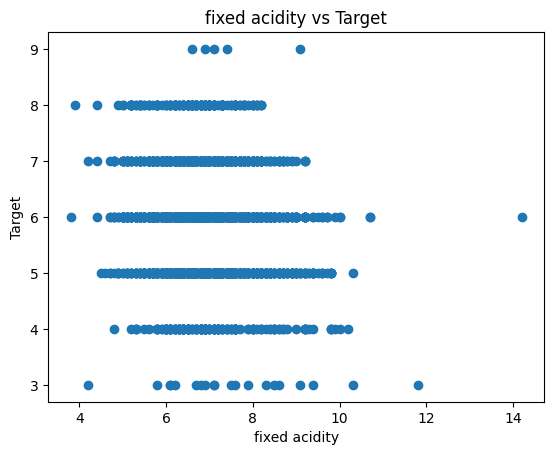

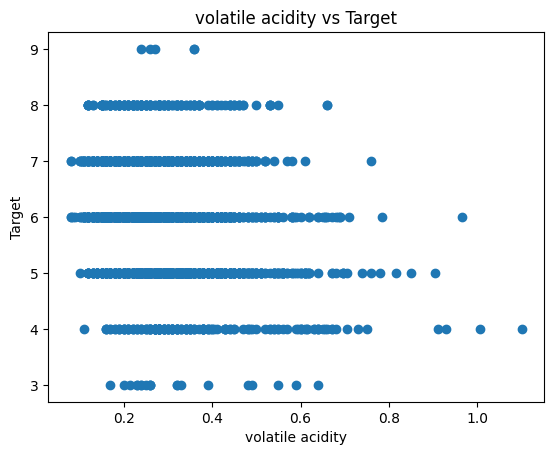

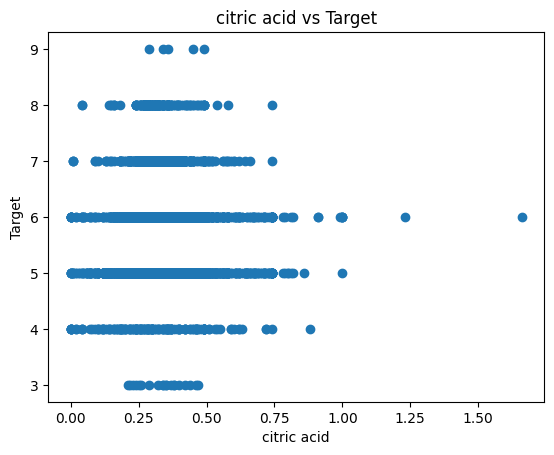

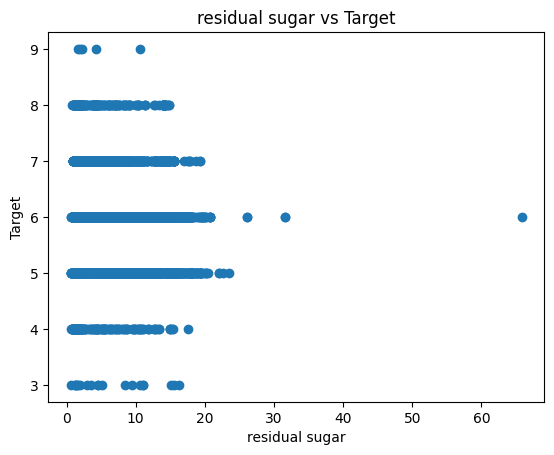

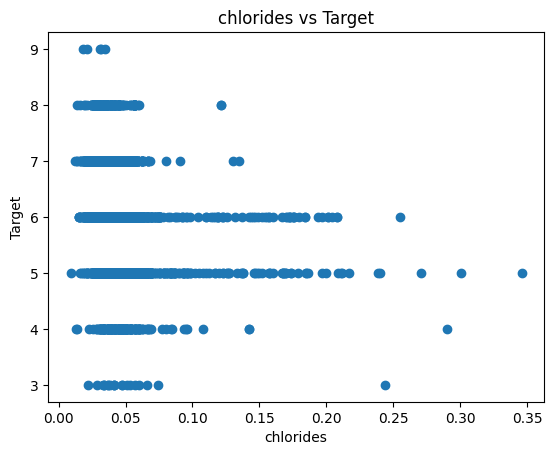

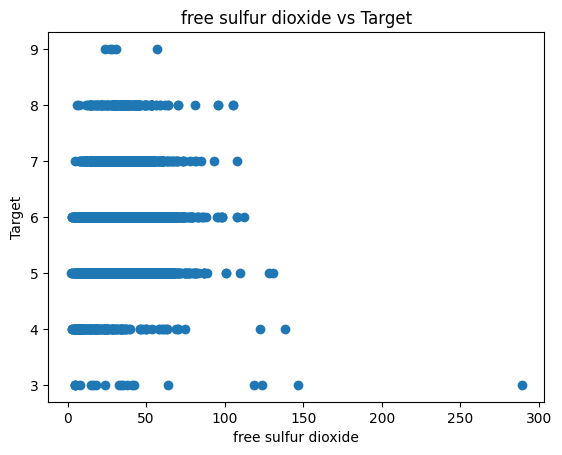

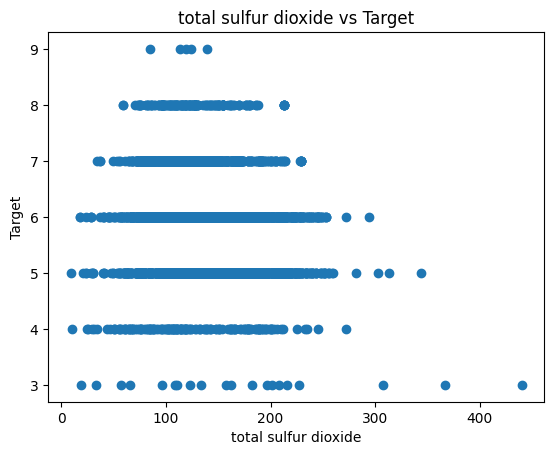

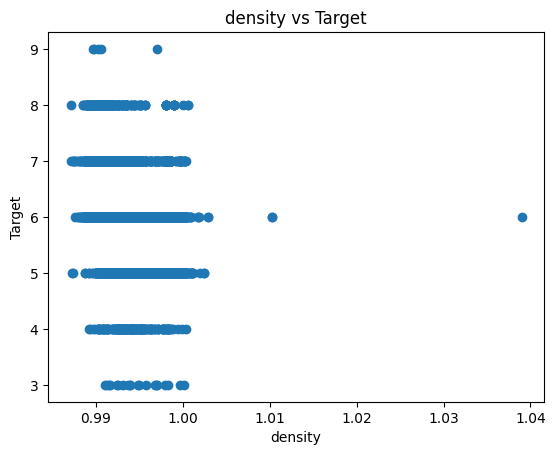

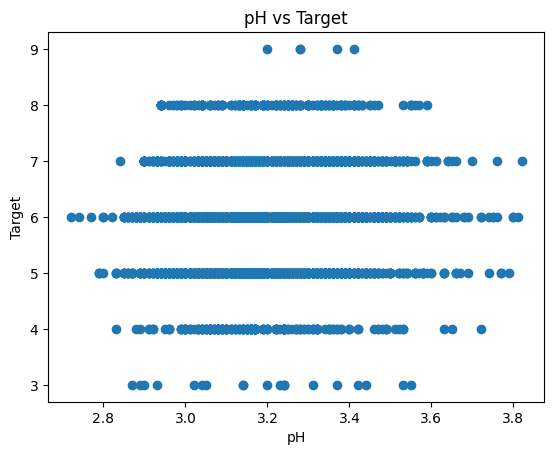

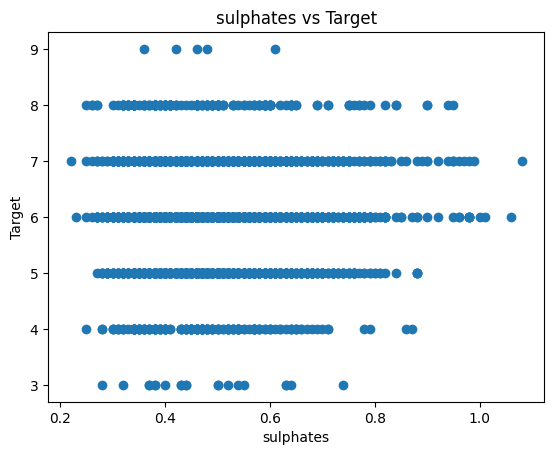

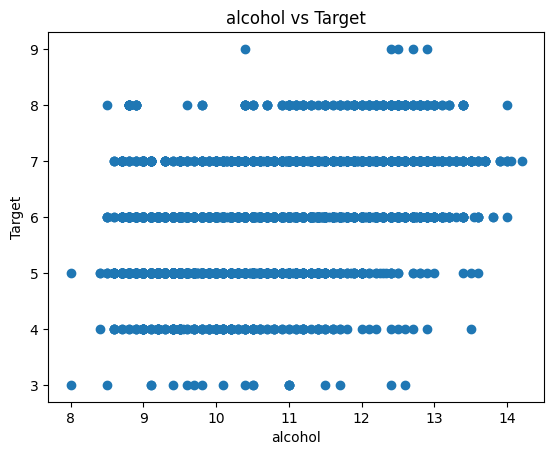

In [6]:
# YOUR CODE HERE
wine_inputs = wine.columns.drop("target")
wine_output = wine["target"]
for i in wine_inputs:
    plt.scatter(wine[i], wine_output)
    plt.xlabel(i)
    plt.ylabel("Target")
    plt.title(f"{i} vs Target")
    plt.show()


Fixed Acidity vs Output: Independent, points on the scatterplot widely fluctuate in location.


Volatile Acidity vs Output: Independent, points are randomly scattered without an apparent trend.


Citric Acid vs Output: Independent because there is no discernible pattern between the actual and predicted values.


Residual Sugar vs Output: Independent because points on this scatterplot vary without pattern.


Chlorides vs Output: Independent as there is no distinguishable pattern between actual values and predicted outputs of this model. 


Free Sulfur Dioxide vs Output: Independent since points on the scatterplot demonstrate no relationship, similar to the residual sugar plot.


Total Sulfur Dioxide vs Output: Independent because no trend is revealed between the points.


Density vs Output: Independent. Points are randomly scattered with no apparent relation.


pH vs Output: Independent as points just create horizontal lines. This does not indicate a correlation between actual and predicted values.


Sulphates vs Output: Independent. Points on the scatterplot also create horizontal lines that do not behave in a way where one variable increases or decreases the other.


### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

MSE = 0.5631540629886564


Text(0, 0.5, 'Predicted')

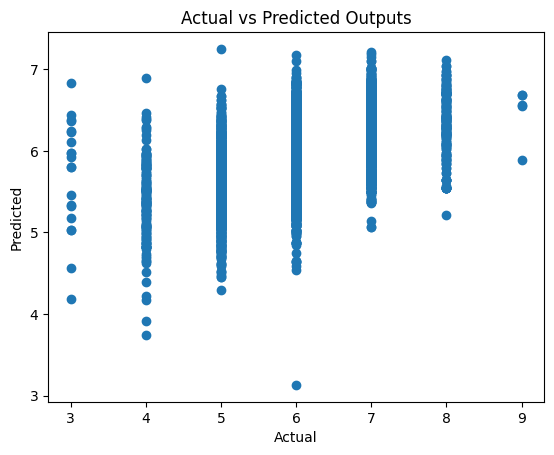

In [7]:
# YOUR CODE HERE
wine_features = wine[wine.columns.drop("target")]
mod1 = sklearn.linear_model.LinearRegression()
mod1.fit(wine_features,wine_output)
predictions1 = mod1.predict(wine_features)
def mean_squared_error(actual, predicted): 
    error = actual - predicted
    error_squared = error * error
    return np.mean(error_squared)
mse=mean_squared_error(wine_output,predictions1)
print("MSE =",mse)
plt.scatter(wine_output,predictions1)
plt.title("Actual vs Predicted Outputs")
plt.xlabel("Actual")
plt.ylabel("Predicted")

By regressing all features of the white subset of the wine dataset on the target column, the mean squared error of the model over the dataset as a whole is approximately 0.56. The actual values plotted against the predicted outputs scatterplot demonstrates what appears to be a weakly positive relationship between the two measures. This indicates that the predictions for this model slightly improve when the actual values increase.

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [8]:
# YOUR CODE HERE
for f in wine_features.columns:
    col = wine_features[[f]]
    mod = sklearn.linear_model.LinearRegression()
    mod.fit(col,wine_output)
    predictions = mod.predict(col)
    mse=mean_squared_error(wine_output,predictions)
    print(f"{f} MSE =",mse)

fixed acidity MSE = 0.774064337751404
volatile acidity MSE = 0.7544611777913112
citric acid MSE = 0.7841290419696332
residual sugar MSE = 0.7767290354362436
chlorides MSE = 0.7496341230508563
free sulfur dioxide MSE = 0.7841433561228635
total sulfur dioxide MSE = 0.7602516302012771
density MSE = 0.7102265148403777
pH MSE = 0.776443165059832
sulphates MSE = 0.7819360335229565
alcohol MSE = 0.6354137863260801


The input target “alcohol” gives the best linear model of the target output on its own. This is because it has the lowest mean squared error value (approximately 0.64) compared to the other features for white wine. However, this model’s predictions are farther off than the full model in problem 5 because the full model returns a smaller MSE of approximately 0.56.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

Text(0, 0.5, 'Count')

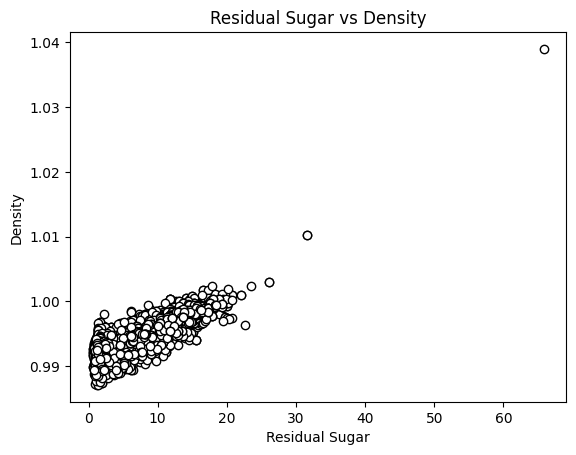

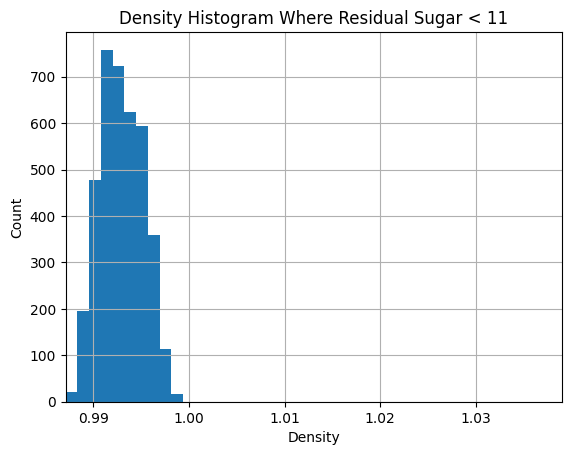

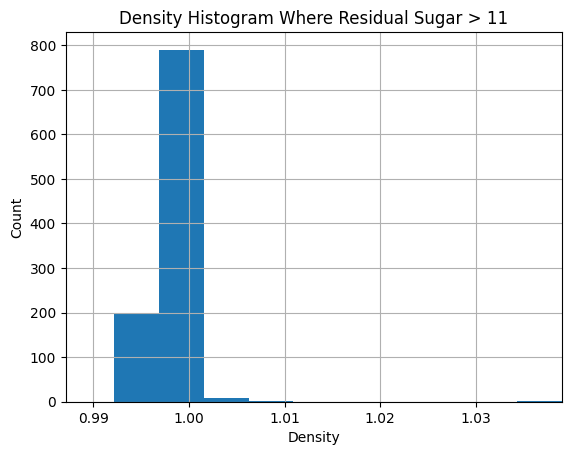

In [23]:
# YOUR CODE HERE
#scatter_matrix = pd.plotting.scatter_matrix(wine,figsize=(12,10))
plt.Figure()
plt.scatter(wine["residual sugar"],wine["density"],c="white",edgecolors="black")
plt.xlabel("Residual Sugar")
plt.ylabel("Density")
plt.title("Residual Sugar vs Density")


t=11
split_group_1 = wine[wine["residual sugar"] < t]
split_group_2 = wine[wine["residual sugar"] > t]

xminimum = wine["density"].min()
xmaximum = wine["density"].max()
plt.figure()
split_group_1["density"].hist()
plt.xlim(xminimum,xmaximum)
plt.title("Density Histogram Where Residual Sugar < 11")
plt.xlabel("Density")
plt.ylabel("Count")
plt.figure()
split_group_2["density"].hist()
plt.xlim(xminimum,xmaximum)
plt.title("Density Histogram Where Residual Sugar > 11")
plt.xlabel("Density")
plt.ylabel("Count")

The pair of columns I chose to focus on were “residual sugar” and “density.” This is because according to the scatterplot matrix, this particular pairing of variables has a visual dependency where residual sugar appears to increase as density increases in white wine. The threshold I chose for splitting the “residual sugar” column was 11 because the scatterplot of the relationship between these two variables shows a distinct increase once “residual sugar” approaches 11. This splits the lower end of the correlation with the upper end. The histograms of the split groups differ in the peaks of their distributions. This difference indicates a dependency since as “residual sugar” increases, the “density” in turn shifts in an upward direction.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [25]:
# YOUR CODE HERE
wine_pca = PCA()
wine_pca.fit(wine_inputs)

ValueError: could not convert string to float: 'fixed acidity'

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [11]:
# YOUR CODE HERE
corr_matrix = wine_features.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


residual sugar and density

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [12]:
# YOUR CODE HERE
# look at 3.17 Lesson: Linear Regression and Outliers

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

NONE